In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
data=load_breast_cancer()

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["Target"]=data.target

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

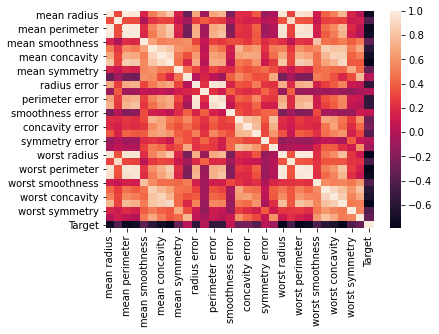

In [5]:
sns.heatmap(df.corr())

In [6]:
X=df.drop("Target",axis=1)
y=df["Target"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [8]:
from sklearn.model_selection import GridSearchCV
params={"n_estimators":(50,100,200),
       "criterion":("gini", "entropy", "log_loss"),
       "min_samples_split":(2,3),
       "max_depth":(10,20,30)}
model=GridSearchCV(classifier,params)

In [9]:
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': (10, 20, 30), 'min_samples_split': (2, 3),
                         'n_estimators': (50, 100, 200)})

In [10]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [11]:
model.best_score_

0.9648417721518987

In [12]:
model.fit(X,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': (10, 20, 30), 'min_samples_split': (2, 3),
                         'n_estimators': (50, 100, 200)})

In [13]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 2,
 'n_estimators': 50}

In [14]:
model.best_score_

0.968390001552554

In [15]:
rf=RandomForestClassifier(criterion="entropy",max_depth=10,min_samples_split=3,n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_estimators=200)

In [16]:
y_pred=rf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [18]:
matrix=confusion_matrix(y_test,y_pred)

In [19]:
matrix

array([[ 58,   5],
       [  3, 105]], dtype=int64)

In [21]:
acc=accuracy_score(y_test,y_pred)
acc

0.9532163742690059